Nama: Almas Rausan Fikri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import matplotlib.ticker as mtick

style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('telco.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Daftar Isi

* [Daftar Isi](#Daftar-Isi)
* [Soal 1](#Soal-1)
* [Soal 2](#Soal-2)
* [Soal 3](#Soal-3)
* [Soal 4](#Soal-4)
* [Soal 5](#Soal-5)
* [Soal 6](#Soal-6)
* [Soal 7](#Soal-7)

# Soal 1

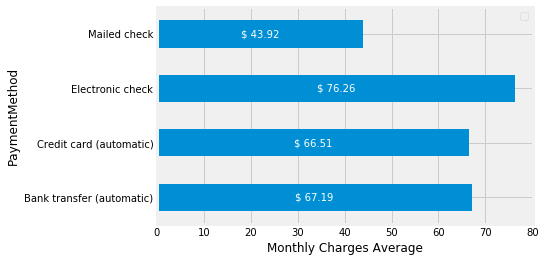

In [5]:
df1 = df.copy()
g = df1.groupby('PaymentMethod').agg({'MonthlyCharges': 'mean'}).plot(kind = 'barh')
g.legend("")
g.set_xlabel("Monthly Charges Average")

for p in g.patches:
    g.annotate(f'$ {p.get_width():.2f}',
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

Rata-rata biaya bulanan untuk electronic check lebih tinggi dibandingkan lainnya, sedangkan mailed check yang paling rendah.

# Soal 2

In [6]:
df2 = df.copy()
df2['tenure_group'] = pd.cut(x = df2['tenure'], bins = [-np.inf,20,40,np.inf], labels = ['Low', 'Medium', 'High'])
df2[['tenure', 'tenure_group']].head()

,tenure,tenure_group
0,1,Low
1,34,Medium
2,2,Low
3,45,High
4,2,Low


In [7]:
df2['customerID'].duplicated().any()

False

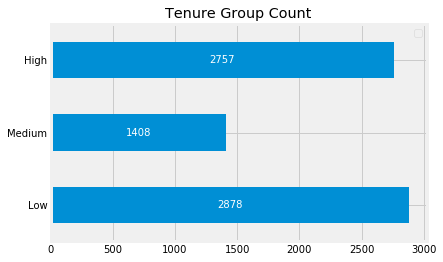

In [8]:
g = df2.groupby('tenure_group').agg({'customerID' : 'nunique'}).plot(kind = 'barh')
g.set_ylabel('')
g.legend('')
g.set_title("Tenure Group Count")

for p in g.patches:
    g.annotate(format(p.get_width(), '0'),
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

Tenure group Low yang paling tinggi, medium paling rendah (countnya)

# Soal 3

Apakah warga senior banyak yang menggunakan layanan telepon?

In [9]:
df3 = df.copy()
df3['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [10]:
df3['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df3x = (df.groupby(['SeniorCitizen', 'PhoneService'])
        .agg({'customerID': 'nunique'})
        .reset_index()
       )
df3x = df3x.merge(df3x.groupby('SeniorCitizen').agg({'customerID': 'sum'}).reset_index(), on='SeniorCitizen')
df3x.columns = ['SeniorCitizen', 'PhoneService', 'ConsumerCount', 'TotalSeniorityBased']
df3x['percent'] = df3x['ConsumerCount'] / df3x['TotalSeniorityBased']
df3x['SeniorCitizen'] = df3x['SeniorCitizen'].apply(lambda x: 'Senior Citizen' if x == 1 else 'Youngster')
df3x

,SeniorCitizen,PhoneService,ConsumerCount,TotalSeniorityBased,percent
0,Youngster,No,578,5901,0.097950
1,Youngster,Yes,5323,5901,0.902050
2,Senior Citizen,No,104,1142,0.091068
3,Senior Citizen,Yes,1038,1142,0.908932


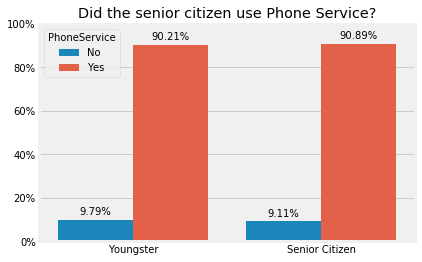

In [12]:
g = sns.barplot(data = df3x, x = 'SeniorCitizen', y = 'percent', hue = 'PhoneService')
g.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_title("Did the senior citizen use Phone Service?")
g.set_ylabel('')
g.set_xlabel('')
plt.ylim(0,1)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2, p.get_height()), 
               ha = 'center', 
               va = 'center',
               xytext=(0, 8),
               textcoords='offset points')

Apakah warga senior banyak yang menggunakan layanan telepon?

Banyak, tapi youngster hanya kalah sedikit.

# Soal 4

Bagaimana distribusi dari total biaya?

In [13]:
df4 = df.copy()

In [14]:
def tofloat(x):
    try:
        result = float(x)
    except:
        result = 'error'
    return result

In [15]:
TotalChargesFloat = df4['TotalCharges'].apply(tofloat)

In [16]:
df4['TotalCharges'][TotalChargesFloat == 'error']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

> Ternyata ada TotalCharges yang isinya cuma " "

In [17]:
TotalChargesFloat = TotalChargesFloat[TotalChargesFloat != 'error'].astype(float)

Text(0.5, 0.98, 'Total Charges Distribution')

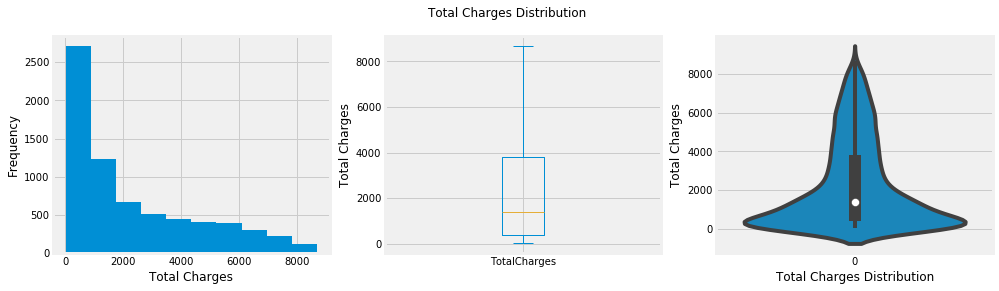

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

g1 = TotalChargesFloat.plot(kind='hist', ax = axes[0])
g2 = TotalChargesFloat.plot(kind='box', ax = axes[1])
g3 = sns.violinplot(data = TotalChargesFloat, ax = axes[2])

g1.set_xlabel('Total Charges')
g2.set_ylabel("Total Charges")
g3.set_ylabel('Total Charges')
g3.set_xlabel('Total Charges Distribution')
plt.suptitle("Total Charges Distribution")

In [19]:
TotalChargesFloat.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
TotalCharges,7032.0,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8


* Distribusinya skew ke kiri / positively skewed berdasarkan:
    * hisotgram, boxplot, violinplot
    * mean > median
* Median = 1397.475, mean = 2283.30..

# Soal 5

Apakah pelanggan yang memiliki biaya bulanan lebih tinggi akan cenderung untuk berhenti berlangganan (churn)?

In [20]:
df5 = df.copy()

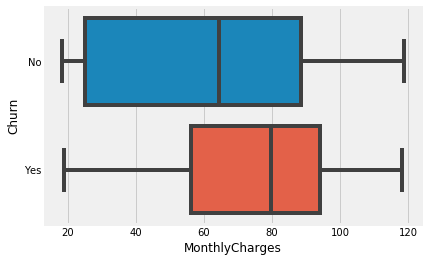

In [21]:
sns.boxplot(data = df5, x = 'MonthlyCharges', y='Churn')

Iya, yang churn cenderung biaya bulanannya lebih tinggi.

# Soal 6

Bagaimana pengaruh memiliki pasangan & tanggungan terhadap tingkat churn pelanggan?

In [22]:
df6 = df.copy()

In [23]:
df6['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df6['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df6['PartnerBool'] = (df6['Partner'] == 'Yes')
df6['DependentsBool'] = (df6['Dependents'] == 'Yes')

Gabungkan data yang menunjukan pelanggan memiliki pasangan dan/atau tanggungan.
* i. Memiliki pasangan dan tanggungan
* ii. Memiliki pasangan dan tidak memiliki tanggungan
* iii. Tidak memiliki pasangan, namun memiliki tanggungan
* iv. Tidak memiliki pasangan dan tanggungan

In [26]:
df6['PartnerDependants'] = np.where(df6['PartnerBool'],
                                np.where(df6['DependentsBool'], 'i', 'ii'),
                                np.where(df6['DependentsBool'], 'iii', 'iv'))

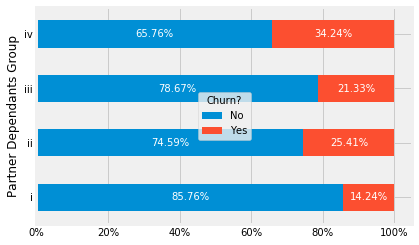

In [27]:
g = df6.groupby('PartnerDependants')['Churn'].value_counts(normalize=True).unstack('Churn').plot(kind='barh', stacked=True)
g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('Partner Dependants Group')
g.legend(loc='center', title = "Churn?")

for p in g.patches:
    g.annotate(format(p.get_width(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

Dari sisi punya tanggungan:
* Punya tanggungan jadi lebih tidak churn ketimbang yang tidak punya. 
    * i > ii 
    * iii > iv

Dari sisi pasangan:
* Punya pasangan jadi lebih tidak churn ketimbang tidak punya.
    * i > iii
    * ii > iv

# Soal 7

Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut dengan hanya memanfaatkan atribut metode pembayaran, jumlah pelanggan, dan churn!

In [28]:
df7 = df.copy()

In [29]:
df7[['customerID', 'PaymentMethod', 'Churn']].head()

,customerID,PaymentMethod,Churn
0,7590-VHVEG,Electronic check,No
1,5575-GNVDE,Mailed check,No
2,3668-QPYBK,Mailed check,Yes
3,7795-CFOCW,Bank transfer (automatic),No
4,9237-HQITU,Electronic check,Yes


In [30]:
df7.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Text(-0.5, 1450, 'Jumlah pengguna berdasarkan metode pembayaran, lalu dilihat lagi berdasarkan kondisi churn atau tidaknya.\nDapat dilihat bahwa pada metode pembayaran "Electronic Check" jumlah churnnya sangat njomplang')

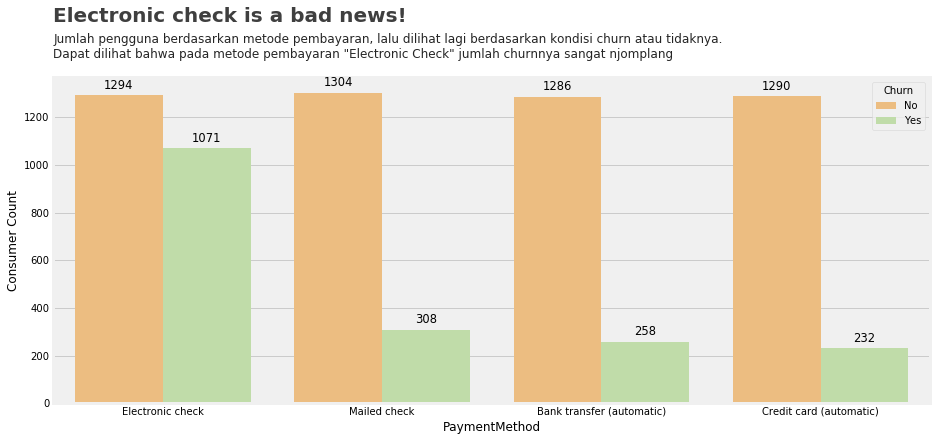

In [31]:
fig = plt.figure(figsize = (14,6))

g = sns.countplot(
    data = df7,
    x = 'PaymentMethod',
    hue = 'Churn',
    palette="Spectral"
)

g.set_ylabel('Consumer Count')

for p in g.patches:
    g.annotate(format(p.get_height(), '0'), 
               xy = (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', 
               va = 'center',
               size = 11.5,
               xytext = (0, 10), 
               textcoords = 'offset points')
    
g.text(x= -0.5, y = 1600, 
       s = "Electronic check is a bad news!",
       fontsize = 20, weight = 'bold', alpha = .75)

g.text(x = -0.5, y = 1450,
       s = 'Jumlah pengguna berdasarkan metode pembayaran, lalu dilihat lagi berdasarkan kondisi churn atau tidaknya.\nDapat dilihat bahwa pada metode pembayaran "Electronic Check" jumlah churnnya sangat njomplang',
       fontsize = 12, alpha = .85)